# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
# adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
# airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
# WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
# bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

articlesDataSet_filename = os.path.join(os.getcwd(), "data_lab8", "articles.csv")

df = pd.read_csv(articlesDataSet_filename)

df.head()

,ID,topic,source,source_url,url,date,authors,title,content_original,content,bias_text,bias
0,004Gt3gcsotuiYmz,terrorism,New York Times - News,www.nytimes.com,http://www.nytimes.com/2016/09/20/nyregion/ahm...,2016-09-20,N. R. Kleinfield,"Bomb Suspect Changed After Trip Abroad, Friend...","Besides his most recent trip to Quetta, Mr. Ra...","Besides his most recent trip to Quetta , Mr. R...",left,0
1,00eP4XD3VdMmHITE,supreme_court,Vox,www.vox.com,https://www.vox.com/policy-and-politics/2018/9...,2018-09-12,"Emily Stewart, Terry Nguyen, Rebecca Jennings,...",Why Susan Collins claims she’s being bribed ov...,Is Maine Republican Sen. Susan Collins being b...,Is Maine Republican Sen. Susan Collins being b...,left,0
2,00FTGIZEd6B8zQ4U,education,Ezra Klein,www.npr.org,http://www.npr.org/blogs/thetwo-way/2014/05/06...,2014-05-06,Anya Kamenetz,Poll: Prestigious Colleges Won't Make You Happ...,Poll: Prestigious Colleges Won't Make You Happ...,Poll : Prestigious Colleges Wo n't Make You Ha...,left,0
3,00HGGqBRf1kzPRlg,us_house,Breitbart News,www.breitbart.com,http://www.breitbart.com/big-government/2017/0...,2017-09-12,Ian Mason,Paul Ryan Reportedly Says No Chance for Border...,"House Speaker Paul Ryan, at a private dinner e...","House Speaker Paul Ryan , at a private dinner ...",right,2
4,00IzI5ynahBVtC9l,white_house,Guest Writer - Left,www.cnn.com,https://www.cnn.com/2019/07/11/politics/donald...,2019-07-11,Analysis Stephen Collinson,OPINION: Trump seeking change of legal fortune...,(CNN) President Donald Trump has reason to hop...,( CNN ) President Donald Trump has reason to h...,left,0


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I have chosen an external dataset from a Github repo (https://github.com/ramybaly/Article-Bias-Prediction) containing different articles scraped from www.allsides.com. This repo had the data in the format of a bunch of json files. I cloned this repo locally, loaded all the json data into a dataframe, and then saved it to a csv file that I uploaded into this jupyter server.
2. I will be predicting the political bias (label) of articles as right, left, or center.
3. This is a supervised machine learning problem, as I am predicting a label. It is a multi-class classification problem using NLP, where the classes are right, left, and center.
4. The features are the vector represenations of the words from the content and title.
5. There a lot of different use cases for this model. Although I'm doing this out of pure interest, I can imagine people running a political campaign wanting to be able to predict at scale, what political bias today's articles have about a certain person. I can also see this as good for analyzing market segmentation. Scrape all articles related to your company / product and see what political bias it is being written with. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

1. To prepare my data, I'll need to perform data cleaning and preprocessing on the content of each of the articles. This includes tokenizing the articles, preprocessing them to remove stop words and words that have low predictive value, using the TFIDF vectorizer + word embeddings. I'll also need to check for class imbalance and potentially downsample if I have execution bottlenecks. Update: I tried using word embeddings, but it seems as though I can't create the word embeddings, replace each of the words in the each article and take the average of those vectors without the kernel dying-- this seems to be an execution bottleneck, so I will just be using the TFIDF vectorizer and see if I can optimize with that.
2. Thinking of using word2vec for the embeddings and a deep averaging NN for multi class classification. Update: Since I've run into a lot of execution bottlenecks with word2vec and the NN, I've opted to use and try to optimize a Random Forest and Gradient Boosted Classifier for this multi-class classification task, where they will each take in the TFIDF vectors and output the political bias label.
3. To evaluate and improve the models' performance, I will perform grid search and do hyperparameter tuning to find the optimal hyperparameters for the TFIDF vectorizer, RF, and Gradient Boosted Classifier.

In [3]:
df.shape

(37554, 12)

In [4]:
df.columns

Index(['ID', 'topic', 'source', 'source_url', 'url', 'date', 'authors',
       'title', 'content_original', 'content', 'bias_text', 'bias'],
      dtype='object')

In [5]:
df.dtypes

ID                  object
topic               object
source              object
source_url          object
url                 object
date                object
authors             object
title               object
content_original    object
content             object
bias_text           object
bias                 int64
dtype: object

In [6]:
df.nunique()

ID                  37554
topic                 108
source                491
source_url            467
url                 37541
date                 2915
authors             12354
title               37554
content_original    37547
content             37554
bias_text               3
bias                    3
dtype: int64

{'left': 13005, 'right': 13734, 'center': 10815}


<AxesSubplot: xlabel='bias_text', ylabel='Count'>

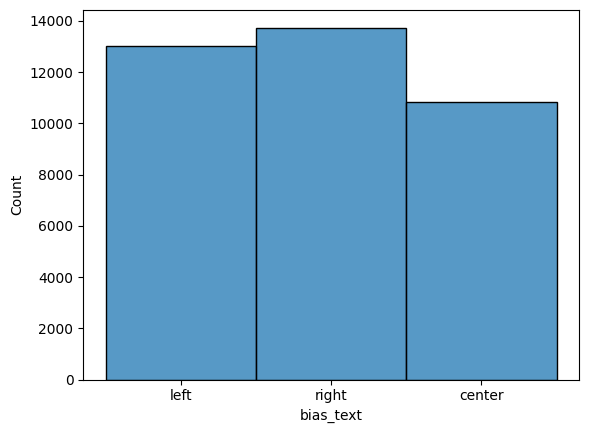

In [7]:
# To check for class imbalance
label_freq = {}
for label in df['bias_text'].unique():
    label_freq[label] = len(df[df['bias_text'] == label])
print(label_freq)

# create histogram of biases
sns.histplot(df['bias_text'])

# We can observe that there is no significant class imbalance!

In [8]:
# Downsample because 37k is a lot to train on.
df = df.sample(frac=0.5, random_state=1234) 

In [9]:
df.shape # we now have a little over 10k samples to train on

(18777, 12)

{'center': 5384, 'left': 6545, 'right': 6848}


<AxesSubplot: xlabel='bias_text', ylabel='Count'>

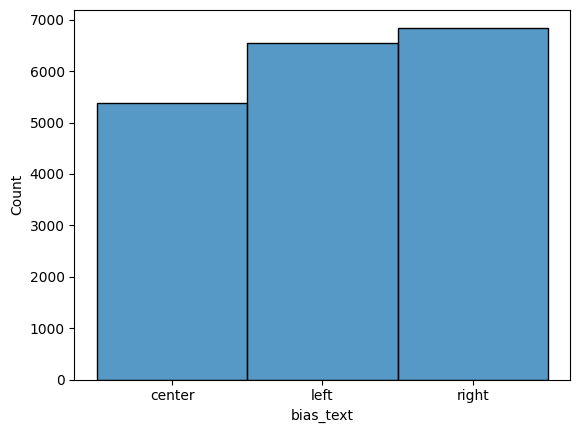

In [10]:
# Check for class imbalance again after downsampling
label_freq = {}
for label in df['bias_text'].unique():
    label_freq[label] = len(df[df['bias_text'] == label])
print(label_freq)

# create histogram of biases
sns.histplot(df['bias_text'])

# We can observe that there is no significant class imbalance!

In [11]:
# explore average length of the content 
for i in range(10):
    print('Document', i, 'has a length of', len(df['content'].iloc[i]), 'characters.')

Document 0 has a length of 5879 characters.
Document 1 has a length of 2336 characters.
Document 2 has a length of 3330 characters.
Document 3 has a length of 5127 characters.
Document 4 has a length of 7341 characters.
Document 5 has a length of 6313 characters.
Document 6 has a length of 5859 characters.
Document 7 has a length of 4031 characters.
Document 8 has a length of 10265 characters.
Document 9 has a length of 1890 characters.


In [12]:
df['content_length'] = [len(df['content'].iloc[i]) for i in range(len(df['content']))]

In [13]:
df.head()

,ID,topic,source,source_url,url,date,authors,title,content_original,content,bias_text,bias,content_length
23655,ojdtG0koWxUKhK1r,technology,Business Insider,www.businessinsider.com,https://www.businessinsider.com/banning-trump-...,2020-05-28,Anthony L. Fisher,Banning Trump from Twitter would be a disservi...,Trump's tweets promoting a fake conspiracy the...,Trump 's tweets promoting a fake conspiracy th...,center,1,5879
28480,sgRt8EFn4T481pmy,elections,New York Times - News,www.nytimes.com,http://www.nytimes.com/2016/02/16/upshot/supre...,2016-02-16,Nate Cohn,Republican Risk Five Key Senate Races with Sup...,"Somewhat more surprising is Kelly Ayotte, a Ne...","Somewhat more surprising is Kelly Ayotte , a N...",left,0,2336
35372,yBFS7i7mmXf1ik62,politics,Daily Beast,www.thedailybeast.com,http://www.thedailybeast.com/articles/2017/04/...,2017-04-15,"Scott Bixby, National Reporter",Protests at Berkeley For And Against 'Chicken'...,Twin protests held either in support or defian...,Twin protests held either in support or defian...,left,0,3330
28701,sM2D4yHJqVtnx1BS,media_bias,Associated Press,www.apnews.com,https://apnews.com/ecbf188e7e200f6215e75f9fb5d...,2020-01-09,David Bauder,Did Fox’s Tucker Carlson play role in calming ...,"FILE - In this March 2, 2017 file photo, Tucke...","FILE - In this March 2 , 2017 file photo , Tuc...",center,1,5127
16229,IgNdTJT0VXClWY8Y,israel,BBC News,www.bbc.com,https://www.bbc.com/news/world-middle-east-478...,NaN,NaN,Israel election: Netanyahu set for record fift...,Media playback is unsupported on your device M...,Israeli PM Benjamin Netanyahu looks all but ce...,center,1,7341


In [14]:
df.describe()

,bias,content_length
count,18777.000000,18777.000000
mean,1.016137,5826.871598
std,0.844419,3953.709987
min,0.000000,131.000000
25%,0.000000,3334.000000
50%,1.000000,4936.000000
75%,2.000000,7007.000000
max,2.000000,53289.000000


<AxesSubplot: xlabel='content_length', ylabel='Count'>

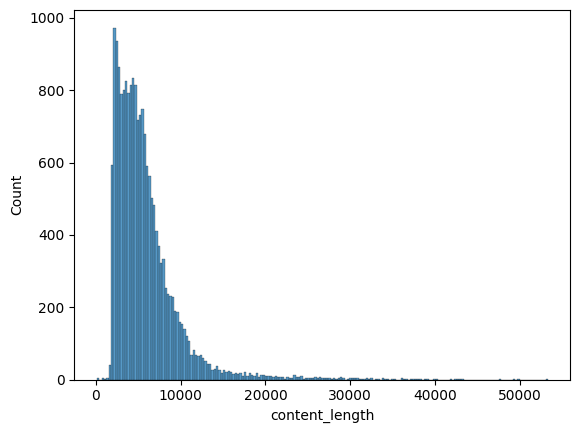

In [15]:
# want to get rid of the articles that have absurdly large content lengths just to make it easier to work with
sns.histplot(df['content_length'])

<AxesSubplot: xlabel='content_length', ylabel='Count'>

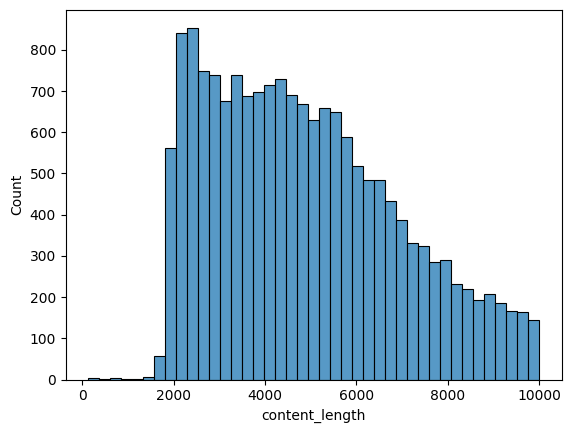

In [16]:
# lets get rid of the rows where the content_length > 10000
df = df[df['content_length'] <= 10000]
sns.histplot(df['content_length'])

In [17]:
df.shape # now we have around 17k samples to work with

(16996, 13)

{'center': 4953, 'left': 5545, 'right': 6498}


<AxesSubplot: xlabel='bias_text', ylabel='Count'>

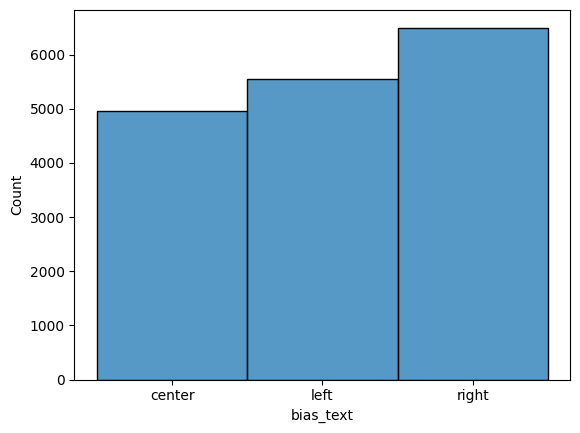

In [18]:
# Check for class imbalance again after downsampling
label_freq = {}
for label in df['bias_text'].unique():
    label_freq[label] = len(df[df['bias_text'] == label])
print(label_freq)

# create histogram of biases
sns.histplot(df['bias_text'])

# We can observe that there is no significant class imbalance!

In [19]:
df.describe()

,bias,content_length
count,16996.000000,16996.000000
mean,1.056072,4887.103671
std,0.839926,2051.440237
min,0.000000,131.000000
25%,0.000000,3175.000000
50%,1.000000,4626.000000
75%,2.000000,6285.000000
max,2.000000,10000.000000


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

To prepare the data, I will drop the unnecessary columns like the ID, urls, date, authors, etc so I can just leave the columns necessary for the NLP analysis (the content and the title and the bias label). To prep the data, I will create a new feature that combines the title and the content and then I will tf-idf vectorize the title and content for all documents. I will then split my data into training and test data using an 80-20 split. Then I will train models for a RandomForestClassifier and a GradientBoostedClassifier and do grid search to find the optimal hyperparameters for the two classifiers and the vectorizer. I chose these two classifier models because they work well for multi-class classification and because a NN was causing me execution bottlenecks that I could not resolve within this VM environment (where the kernel kept dying every 20 minutes). I will also use a fraction of the training data for validation for the gradient boosted classifier and then compare the test accuracies for each of the classifiers to finally choose a model that generalizes well to new data.  

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow.keras as keras
import time

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

### Data Prep + Feature Engineering

In [23]:
# drop unnecessary columns that won't add predictive value
df = df.drop(columns=['ID', 'topic',  'source', 'source_url', 'url', 'date', 'authors', 'content_original'])

In [24]:
df.columns

Index(['title', 'content', 'bias_text', 'bias', 'content_length'], dtype='object')

In [25]:
# combine title and content to get full article
df['full_article'] = df['title'] + " . " + df['content']
df['full_article']

23655    Banning Trump from Twitter would be a disservi...
28480    Republican Risk Five Key Senate Races with Sup...
35372    Protests at Berkeley For And Against 'Chicken'...
28701    Did Fox’s Tucker Carlson play role in calming ...
16229    Israel election: Netanyahu set for record fift...
                               ...                        
18378    Liberal Democrats, Trump loyalists, and women ...
37079    Green, Yellow, Orange Or Red? This New Tool Sh...
14554    Berkeley Riot Explodes: Trump Supporters Beate...
14471    Why Your Ideological Echo Chamber Isn't Just B...
28008    White House Offers Stealth Campaign to Support...
Name: full_article, Length: 16996, dtype: object

### Choose features and labels. Split Training and Test Data.

In [26]:
X = df['full_article']
y = df['bias']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [28]:
data = [X_train, X_test, y_train, y_test]
for d in data:
    print(d.shape)
    print(d.head())

(13596,)
11169    David Sorensen becomes second Trump aide to qu...
9516     'Ideological' Or 'Illogical': President Obama ...
10215    Marianne Williamson Is Way Out There, But She ...
31005    NYT Fact Check: Actually, the Overwhelming Maj...
20402    OPINION: State of the Union promises epic poli...
Name: full_article, dtype: object
(3400,)
22989    Bipartisan Senate group seeks to block militar...
7356      Will the media and resistance be ready on day...
28503    New York Daily News joins growing number of ne...
36257    Economic Armageddon? Republicans call sequeste...
33603    Trump threatens to declare Congress adjourned ...
Name: full_article, dtype: object
(13596,)
11169    1
9516     1
10215    2
31005    2
20402    0
Name: bias, dtype: int64
(3400,)
22989    2
7356     0
28503    2
36257    2
33603    2
Name: bias, dtype: int64


### Vectorize with TFIDF

In [29]:
def prep_tfidf(X_train, X_test, min_df, max_df=1.0, ngram_range=(1,2)):
    tfidf_vectorizer = TfidfVectorizer(min_df=min_df, max_df=max_df, ngram_range=ngram_range)
    tfidf_vectorizer.fit(X_train)
    X_train_tfidf = tfidf_vectorizer.transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)
    vocabulary_size = len(tfidf_vectorizer.vocabulary_)
    return X_train_tfidf, X_test_tfidf, vocabulary_size

### Now create and optimize Random Forest Classifier using the embeddings

In [30]:
def get_class_preds(all_probs):
    class_predictions = []
    for probs in all_probs:
        class_predictions.append(np.argmax(probs))
    return class_predictions

In [31]:
def rf_train_and_predict(num_trees, X_train_data, X_test_data, y_train_data, y_test_data):
    # 1. Create the RandomForestClassifier model object below and assign to variable 'rf_20_model'
    rf_model = RandomForestClassifier(criterion='entropy', n_estimators=num_trees)
    
    # 2. Fit the model to the training data below
    rf_model.fit(X_train_data, y_train_data)
    
    # 3. Make predictions on the test data using the predict_proba() method 
    rf_preds = rf_model.predict_proba(X_test_data)
    print(rf_preds[0])

    # 4. Get class predictions
    class_preds = get_class_preds(rf_preds)

    # 5. Return accuracy score
    return accuracy_score(y_test_data, class_preds)

### Manually Performing Grid Search between number of trees and min_df

In [43]:
doc_freqs = [20, 50, 100, 200, 500]
trees = [16, 32, 64, 128]
acc_scores = []
for min_df in doc_freqs:
    X_train_tfidf, X_test_tfidf, vocabulary_size = prep_tfidf(X_train, X_test, min_df)
    print("Min DF:", min_df, "\tVocab Size:", vocabulary_size)
    for t in trees:
        acc_score = rf_train_and_predict(t, X_train_tfidf, X_test_tfidf, y_train, y_test)
        print("trees = ", t , ", Accuracy Score = ", acc_score) 
        acc_scores.append(acc_score)

Min DF: 20 	Vocab Size: 74305
[0.375 0.125 0.5  ]
trees =  16 , Accuracy Score =  0.5961764705882353
[0.1875  0.28125 0.53125]
trees =  32 , Accuracy Score =  0.6214705882352941
[0.25    0.21875 0.53125]
trees =  64 , Accuracy Score =  0.6367647058823529
[0.265625  0.2109375 0.5234375]
trees =  128 , Accuracy Score =  0.6529411764705882
Min DF: 50 	Vocab Size: 31639
[0.1875 0.3125 0.5   ]
trees =  16 , Accuracy Score =  0.5647058823529412
[0.25   0.1875 0.5625]
trees =  32 , Accuracy Score =  0.625
[0.21875  0.234375 0.546875]
trees =  64 , Accuracy Score =  0.6464705882352941
[0.2421875 0.1796875 0.578125 ]
trees =  128 , Accuracy Score =  0.6617647058823529
Min DF: 100 	Vocab Size: 16112
[0.1875 0.3125 0.5   ]
trees =  16 , Accuracy Score =  0.5861764705882353
[0.28125 0.34375 0.375  ]
trees =  32 , Accuracy Score =  0.6276470588235294
[0.265625 0.15625  0.578125]
trees =  64 , Accuracy Score =  0.655
[0.265625  0.2109375 0.5234375]
trees =  128 , Accuracy Score =  0.6602941176470588

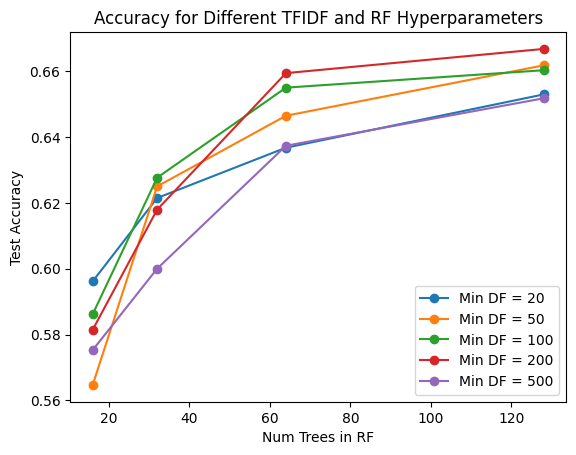

In [50]:
# plot the results
# 20 values in acc_scores 
for i in range(5):
    plt.plot(trees, acc_scores[4*i:4*(i+1)], label="Min DF = " + str(doc_freqs[i]), marker='o') 
plt.title("Accuracy for Different TFIDF and RF Hyperparameters")
plt.xlabel("Num Trees in RF")
plt.ylabel("Test Accuracy")
plt.legend()
plt.show()

Findings: The best test accuracy is around 66.67% with hyperparameters of min_df = 200 for the TFIDF vectorizer and n_estimators = 128 for the RF. The test accuracy is still quite low I'd say.
Next attempt: I'll try these same hyperparameters for an ngram_range of (1, 3) to see if that adds more context.

In [33]:
## now changing increasing the ngram_range to (1, 3) (include trigrams). also getting rid of some values in the ranges to reduce computation
doc_freqs = [20, 50, 100, 200]
trees = [32, 64, 128, 256]
acc_scores = []
for min_df in doc_freqs:
    X_train_tfidf, X_test_tfidf, vocabulary_size = prep_tfidf(X_train, X_test, min_df, ngram_range=(1,3))
    print("Min DF:", min_df, "\tVocab Size:", vocabulary_size)
    for t in trees:
        acc_score = rf_train_and_predict(t, X_train_tfidf, X_test_tfidf, y_train, y_test)
        print("trees = ", t , ", Accuracy Score = ", acc_score) 
        acc_scores.append(acc_score)

Min DF: 20 	Vocab Size: 102748
[0.1875 0.125  0.6875]
trees =  32 , Accuracy Score =  0.6241176470588236
[0.296875 0.15625  0.546875]
trees =  64 , Accuracy Score =  0.6547058823529411
[0.3515625 0.2109375 0.4375   ]
trees =  128 , Accuracy Score =  0.6529411764705882
[0.26953125 0.1875     0.54296875]
trees =  256 , Accuracy Score =  0.6514705882352941
Min DF: 50 	Vocab Size: 39366
[0.25   0.3125 0.4375]
trees =  32 , Accuracy Score =  0.6326470588235295
[0.265625 0.234375 0.5     ]
trees =  64 , Accuracy Score =  0.6717647058823529
[0.203125 0.234375 0.5625  ]
trees =  128 , Accuracy Score =  0.6585294117647059
[0.26171875 0.203125   0.53515625]
trees =  256 , Accuracy Score =  0.6679411764705883
Min DF: 100 	Vocab Size: 18740
[0.3125 0.25   0.4375]
trees =  32 , Accuracy Score =  0.6329411764705882
[0.265625 0.203125 0.53125 ]
trees =  64 , Accuracy Score =  0.6476470588235295
[0.234375  0.1640625 0.6015625]
trees =  128 , Accuracy Score =  0.6602941176470588
[0.28125 0.1875  0.5312

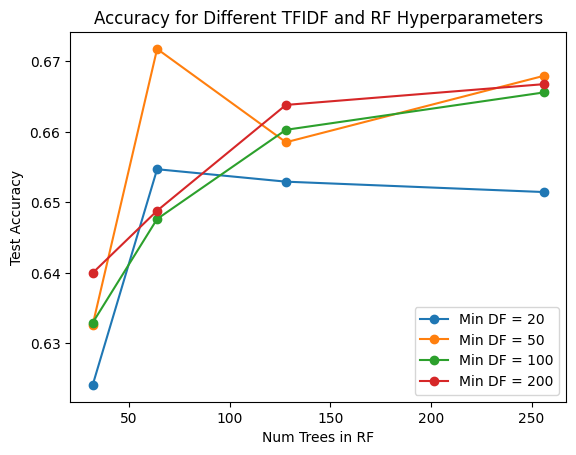

In [34]:
# plot the results
# 16 values in acc_scores 
for i in range(4):
    plt.plot(trees, acc_scores[4*i:4*(i+1)], label="Min DF = " + str(doc_freqs[i]), marker='o') 
plt.title("Accuracy for Different TFIDF and RF Hyperparameters")
plt.xlabel("Num Trees in RF")
plt.ylabel("Test Accuracy")
plt.legend()
plt.show()

Findings: The best test accuracy is around 67.1% with hyperparameters of min_df = 50 for the TFIDF vectorizer and n_estimators = 128 for the RF. It se

### Try Gradient Boosted Classifier

In [31]:
def gb_train_and_predict(lr, num_estimators, X_train_data, X_test_data, y_train_data, y_test_data):
    clf = GradientBoostingClassifier(n_estimators=num_estimators, learning_rate=lr, verbose=1, n_iter_no_change=30) # this will set aside 0.1 of the training data as validation and stop early if there is no change within 30 itertations
    clf.fit(X_train_data, y_train_data)
    preds = clf.predict_proba(X_test_data)
    class_preds = get_class_preds(preds)
    return accuracy_score(y_test_data, class_preds)

In [ ]:
learning_rates = [0.75, 0.5, 0.1] 
doc_freqs = [50]
acc_scores = []
for min_df in doc_freqs:
    X_train_tfidf, X_test_tfidf, vocabulary_size = prep_tfidf(X_train, X_test, min_df=50, ngram_range=(1,3))
    print("Min DF:", min_df, "\tVocab Size:", vocabulary_size)
    for lr in learning_rates:
        print("LEARNING RATE:", lr, "\tNUM ESTIMATORS:", 80)
        acc = gb_train_and_predict(lr, 80, X_train_tfidf, X_test_tfidf, y_train, y_test)
        print("ACCURACY:", acc)
        acc_scores.append(acc)

Min DF: 50 	Vocab Size: 39366
LEARNING RATE: 0.75 	NUM ESTIMATORS: 80
      Iter       Train Loss   Remaining Time 
         1           0.9658            8.41m
         2           0.8808            8.32m
         3           0.8386            8.22m
         4           0.8090            8.11m
         5           0.7830            8.01m
         6           0.7605            7.91m
         7           0.7409            7.81m
         8           0.7234            7.70m
         9           0.7093            7.59m
        10           0.6954            7.48m
        20           0.5915            6.41m
        30           0.5213            5.34m
        40           0.4702            4.27m
        50           0.4273            3.20m
        60           0.3906            2.13m
        70           0.3595            1.07m
        80           0.3314            0.00s
ACCURACY: 0.6947058823529412
LEARNING RATE: 0.5 	NUM ESTIMATORS: 80
      Iter       Train Loss   Remaining Time 
     

In [32]:
# since the kernel died unexpectedly for the above cell, i will just run it for a learning rate of 0.1
min_df = 50
lr = 0.1
X_train_tfidf, X_test_tfidf, vocabulary_size = prep_tfidf(X_train, X_test, min_df=50, ngram_range=(1,3))
print("Min DF:", min_df, "\tVocab Size:", vocabulary_size)
print("LEARNING RATE:", lr, "\tNUM ESTIMATORS:", 80)
acc = gb_train_and_predict(lr, 80, X_train_tfidf, X_test_tfidf, y_train, y_test)
print("ACCURACY:", acc)

Min DF: 50 	Vocab Size: 39366
LEARNING RATE: 0.1 	NUM ESTIMATORS: 80
      Iter       Train Loss   Remaining Time 
         1           1.0675            8.34m
         2           1.0472            8.28m
         3           1.0299            8.19m
         4           1.0136            8.08m
         5           0.9996            7.98m
         6           0.9867            7.87m
         7           0.9744            7.77m
         8           0.9639            7.67m
         9           0.9530            7.56m
        10           0.9441            7.46m
        20           0.8682            6.39m
        30           0.8202            5.33m
        40           0.7845            4.26m
        50           0.7546            3.20m
        60           0.7293            2.13m
        70           0.7074            1.07m
        80           0.6872            0.00s
ACCURACY: 0.6982352941176471


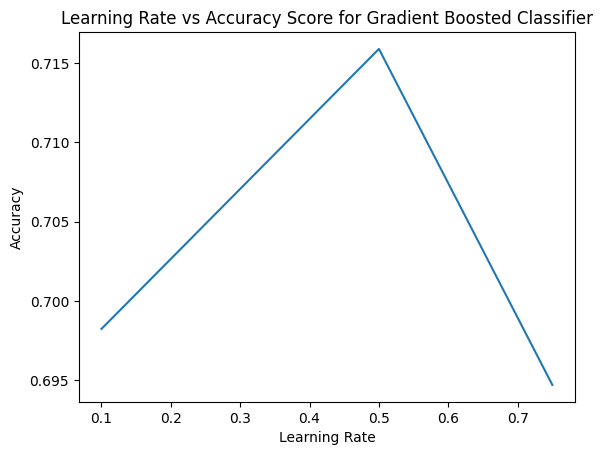

In [33]:
acc_scores = [0.6947058823529412, 0.7158823529411765, 0.6982352941176471]
learning_rates = [0.75, 0.5, 0.1]
plt.plot(learning_rates, acc_scores)
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.title("Learning Rate vs Accuracy Score for Gradient Boosted Classifier")
plt.show()

Findings: For the gradient boosted classifier, the best hyperparameters included a learning rate of 0.5 with around 80 n_estimators. 

### Final Model Training and Results

**Overall, out of the RandomForestClassifier and the GradientBoostedClassifer, the best model was the GradientBoostedClassifier with a test accuracy of around 71.6%. The hyperparameters to use are min_df = 50, n_gram_range=(1,3), n_estimators=80, and learning_rate=0.5.**

In [32]:
# Optimal Hyperparameters
min_df = 50
ngram_range = (1, 3)
lr = 0.5
n_estimators=80

# Vectorize data
X_train_tfidf, X_test_tfidf, vocabulary_size = prep_tfidf(X_train, X_test, min_df=min_df, ngram_range=ngram_range)

# Train, Predict, and Validate Model
clf = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=lr, verbose=1, n_iter_no_change=30) # this will set aside 0.1 of the training data as validation and stop early if there is no change within 30 itertations

clf.fit(X_train_tfidf, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.9943            8.52m
         2           0.9277            8.41m
         3           0.8891            8.32m
         4           0.8591            8.20m
         5           0.8302            8.08m
         6           0.8094            7.97m
         7           0.7909            7.86m
         8           0.7756            7.76m
         9           0.7599            7.65m
        10           0.7464            7.54m
        20           0.6486            6.47m
        30           0.5854            5.39m
        40           0.5376            4.30m
        50           0.5000            3.22m
        60           0.4686            2.14m
        70           0.4377            1.07m
        80           0.4119            0.00s


GradientBoostingClassifier(learning_rate=0.5, n_estimators=80,
                           n_iter_no_change=30, verbose=1)

In [33]:
# Make predictions
preds = clf.predict_proba(X_test_tfidf)

class_preds = get_class_preds(preds)
 
accuracy = accuracy_score(y_test, class_preds)

# Print Accuracy Scrore
print(accuracy)

0.7058823529411765


In [35]:
# Randomly see different test data and their predictions
test_docs = [10*i for i in range(10)]
for index in test_docs:
    print("ARTICLE: ", X_test.iloc[index])
    print("ACTUAL LABEL: ", y_test.iloc[index])
    print("PREDICTED LABEL: ", class_preds[index])
    print("---\n")

ARTICLE:  Bipartisan Senate group seeks to block military funds to Syria . A bipartisan group of senators have introduced legislation to block the U.S. from escalating its involvement in the Syrian civil war as concerns mount on Capitol Hill over the Obama administration 's plan to directly arm rebels .
Senators Rand Paul , R-Ky. ; Mike Lee , R-Utah ; Tom Udall , D-N.M , ; and Chris Murphy , D-Conn. , introduced the bill Thursday to prohibit the Defense Department and intelligence agencies from funding operations in Syria .
Earlier this month , Obama announced the U.S. would begin providing arms and ammunition , after President Bashar Assad 's military dealt the rebels serious setbacks . The conflict is now in its third year with some 93,000 estimated dead .
Paul said he was disturbed by the president 's decision to reverse course and arm the rebels , fearing getting mired in a conflict in which little is known about the fighters battling the regime .
`` Engaging in yet another conflic